In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("50_Startups - 50_Startups.csv")

In [3]:
df.shape

(50, 5)

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
df.isnull().sum().sort_values(ascending=False)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

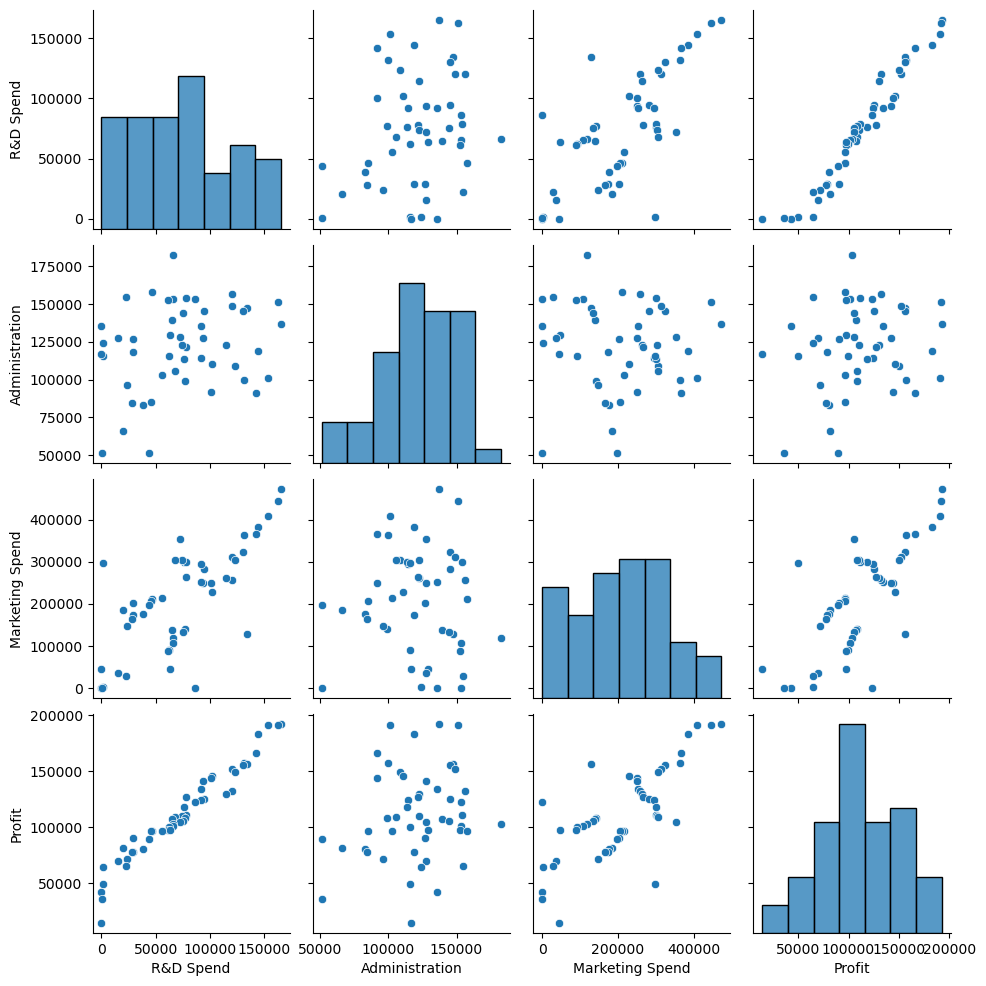

In [10]:
sns.pairplot(df)

In [ ]:
!pip install category_encoders

In [12]:
import category_encoders as ce
encoder= ce.OneHotEncoder(cols='State')
df=encoder.fit_transform(df)
df.head()

,R&D Spend,Administration,Marketing Spend,State_1,State_2,State_3,Profit
0,165349.20,136897.80,471784.10,1,0,0,192261.83
1,162597.70,151377.59,443898.53,0,1,0,191792.06
2,153441.51,101145.55,407934.54,0,0,1,191050.39
3,144372.41,118671.85,383199.62,1,0,0,182901.99
4,142107.34,91391.77,366168.42,0,0,1,166187.94


In [13]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State_1              int64
State_2              int64
State_3              int64
Profit             float64
dtype: object

In [14]:
# split the dataset into input features and target value
x=df.drop('Profit',axis=1)
y=df['Profit']
x.head()

,R&D Spend,Administration,Marketing Spend,State_1,State_2,State_3
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [15]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [16]:
#divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
x_train.shape,y_train.shape

((40, 6), (40,))

In [18]:
x_test.shape,y_test.shape

((10, 6), (10,))

In [19]:
# apply ml alogirthm to training data
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
#model prediction
y_pred=model.predict(x_test)

In [22]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [23]:
#find r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

93.47068473282422

In [24]:
print("r2_score of the model is",round(r2_score(y_test,y_pred)*100,2),"%")

r2_score of the model is 93.47 %


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Function to calculate MSE, MAE, and RMSE
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse
mse, mae, rmse = calculate_metrics(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 83502864.03
MAE: 7514.29
RMSE: 9137.99
